<a href="https://colab.research.google.com/github/shreeparab1890/Indian-Cricketer-Classifier/blob/main/indian_cricketer_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#img = cv2.imread('/content/drive/MyDrive/new_data/test_images/sharapova1.jpg')
#img.shape

In [2]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/new_data/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/new_data/opencv/haarcascades/haarcascade_eye.xml')

#faces = face_cascade.detectMultiScale(img, 1.3, 5)
#faces

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

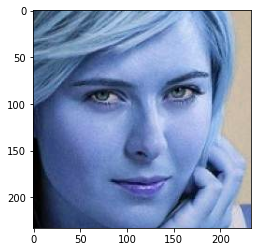

In [6]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/new_data/test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [ ]:
#!unzip "/content/new_data.zip"

In [4]:
path_to_data = "/content/drive/MyDrive/new_data/top_5_criketers_images_updated"
path_to_cr_data = "/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/"

In [5]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [6]:
img_dirs

['/content/drive/MyDrive/new_data/top_5_criketers_images_updated/virat_kohli',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/Virendra Sehwag',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/ms_dhoni',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/rahul_dravid',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/sachin_tendulkar',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/sunil_gavaskar',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/Saurav Ganguly',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/kapil_dev',
 '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/.ipynb_checkpoints']

In [7]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [8]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
      try:
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
          cropped_folder = path_to_cr_data + celebrity_name
          if not os.path.exists(cropped_folder):
              os.makedirs(cropped_folder)
              cropped_image_dirs.append(cropped_folder)
              print("Generating cropped images in folder: ",cropped_folder)
          cropped_file_name = celebrity_name + str(count) + ".png"
          cropped_file_path = cropped_folder + "/" + cropped_file_name
          cv2.imwrite(cropped_file_path, roi_color)
          celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
          count += 1
      except:
        print("error")

Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli
Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/Virendra Sehwag
Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/ms_dhoni
error
Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/rahul_dravid
Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/sachin_tendulkar
Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/sunil_gavaskar
Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/Saurav Ganguly
Generating cropped images in folder:  /content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/kapil_dev


In [9]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:
#im_har = w2d(cropped_image,'db1',5)
#plt.imshow(im_har, cmap='gray')

In [10]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'virat_kohli': ['/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli1.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli2.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli3.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli4.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli6.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli7.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli8.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli9.png',
  '/content/drive/MyDrive/new_data/top_5_criketers_images_updated/cropped/virat_kohli/virat_kohli10.png',
  '/content/drive/MyDrive/new_data/top_

In [11]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'virat_kohli': 0,
 'Virendra Sehwag': 1,
 'ms_dhoni': 2,
 'rahul_dravid': 3,
 'sachin_tendulkar': 4,
 'sunil_gavaskar': 5,
 'Saurav Ganguly': 6,
 'kapil_dev': 7}

In [12]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [13]:
len(X[0])

4096

In [16]:
32*32*3 + 32*32

4096

In [14]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(629, 4096)

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7721518987341772

In [17]:
len(X_test)

158

In [18]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        33
           1       0.50      0.27      0.35        11
           2       1.00      0.29      0.44        14
           3       0.78      0.50      0.61        14
           4       0.61      0.95      0.75        20
           5       0.87      0.96      0.92        28
           6       0.82      0.82      0.82        17
           7       0.80      0.76      0.78        21

    accuracy                           0.77       158
   macro avg       0.77      0.69      0.69       158
weighted avg       0.79      0.77      0.75       158



In [19]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [20]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [21]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.704882,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.439418,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.692116,{'logisticregression__C': 5}


In [22]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [23]:
best_estimators['svm'].score(X_test,y_test)

0.7974683544303798

In [24]:
best_estimators['random_forest'].score(X_test,y_test)

0.5253164556962026

In [25]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7721518987341772

In [26]:
best_clf = best_estimators['svm']

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  2,  1,  1,  0,  3],
       [ 2,  0,  8,  0,  2,  2,  0,  0],
       [ 1,  2,  0,  8,  1,  0,  2,  0],
       [ 0,  1,  0,  0, 16,  2,  1,  0],
       [ 0,  0,  0,  0,  2, 26,  0,  0],
       [ 0,  1,  0,  1,  1,  0, 14,  0],
       [ 0,  0,  0,  0,  3,  1,  0, 17]])

Text(69.0, 0.5, 'Truth')

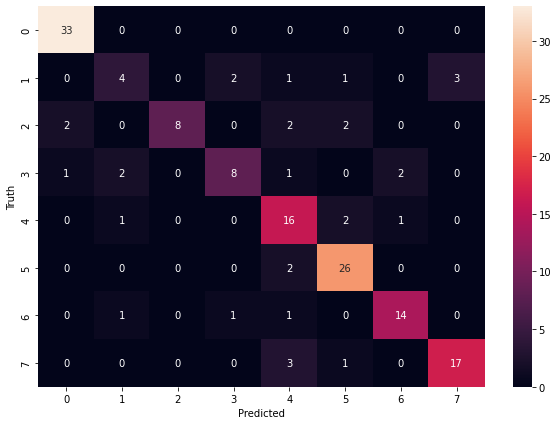

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
class_dict

{'virat_kohli': 0,
 'Virendra Sehwag': 1,
 'ms_dhoni': 2,
 'rahul_dravid': 3,
 'sachin_tendulkar': 4,
 'sunil_gavaskar': 5,
 'Saurav Ganguly': 6,
 'kapil_dev': 7}

In [31]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'cri_saved_model1.pkl') 

['cri_saved_model1.pkl']

In [32]:
import json
with open("/content/class_cri_dictionary1.json","w") as f:
    f.write(json.dumps(class_dict))